In [ ]:
# Check free memory available
%system free -m

In [ ]:
#! pip install pandas_gbq
#! pip install panel
#! pip install hvplot

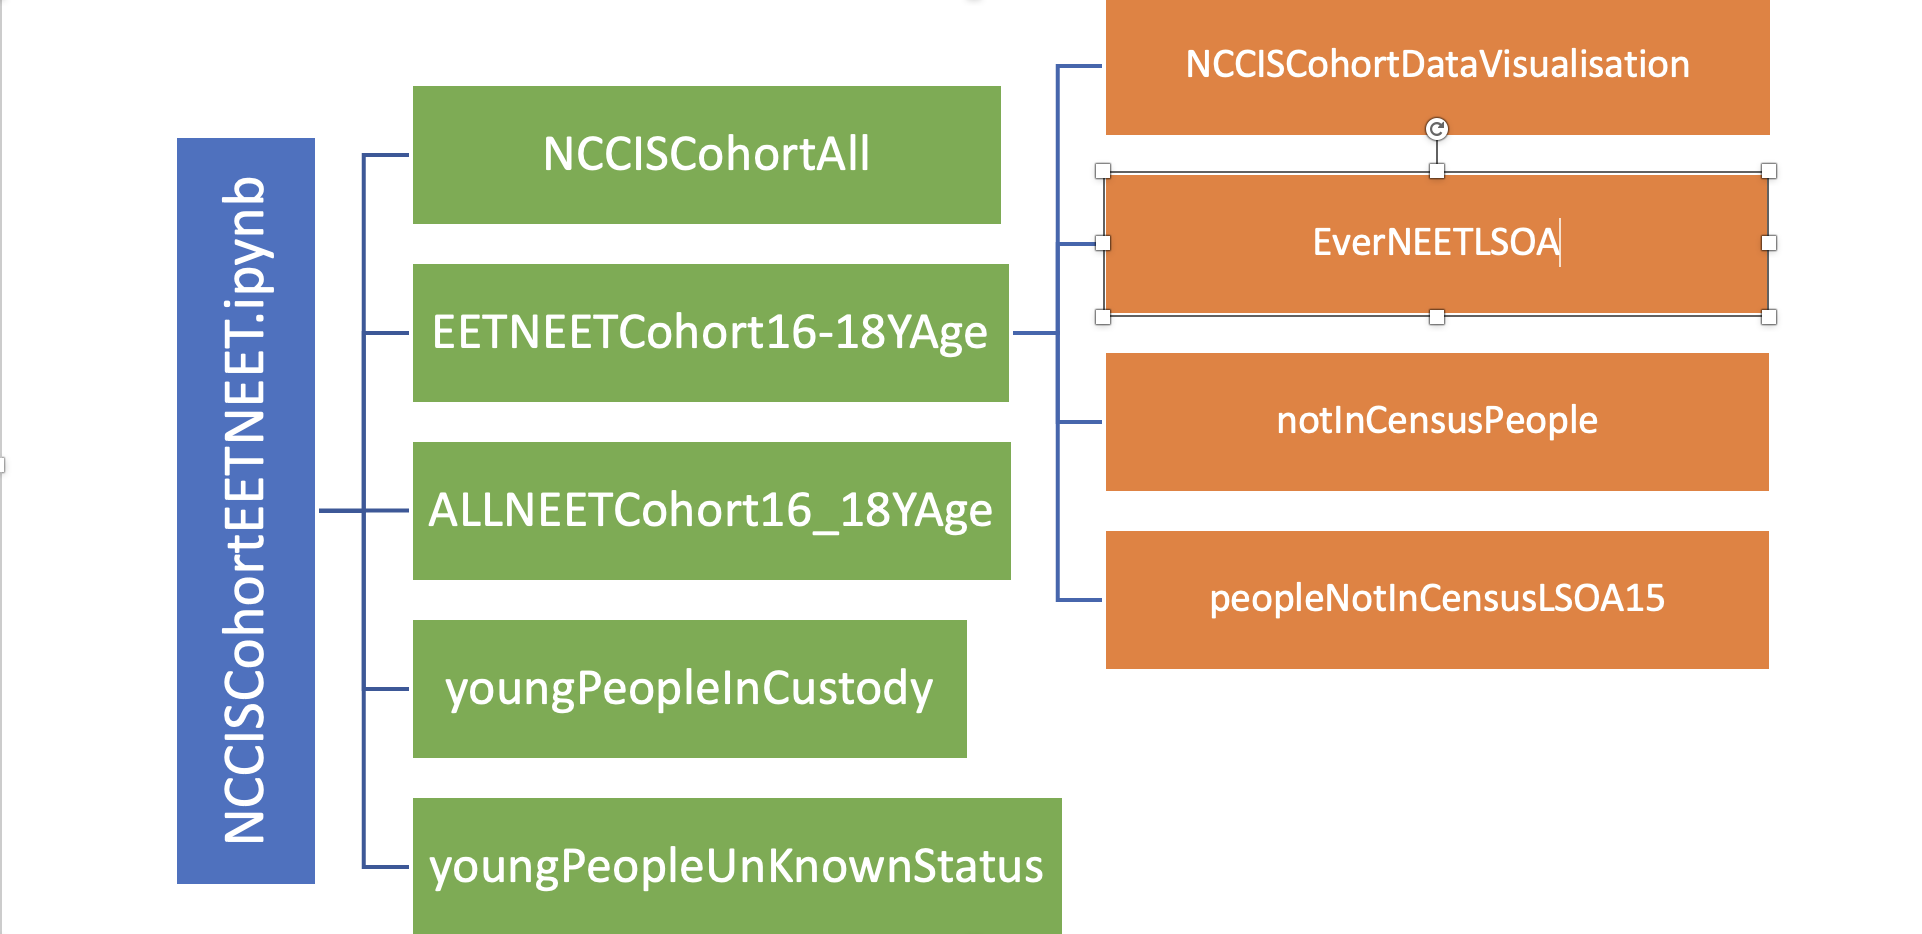

In [ ]:
# Import required libraries
from google.cloud import bigquery
import gc
from dateutil.relativedelta import relativedelta
import numpy as np
import math
import os
import pandas_gbq as pdg
import pandas as pd
import panel as pn
pn.extension('tabulator')
import hvplot.pandas

In [ ]:
# to run locally 
# panel serve Interactive_dashboard.ipynb

In [ ]:
#PLOT_OUTPUT_LOCATION = "reports/figures/"
def returnPlotLocation():
    PLOT_OUTPUT_LOCATION = "reports/figures/"
    return PLOT_OUTPUT_LOCATION

In [ ]:
def retINTERIM_DATA_LOCATION():
    INTERIM_DATA_LOCATION = "data/interim/"
    return INTERIM_DATA_LOCATION

In [ ]:
def NCCISCohortAll():
    return pd.read_csv(retINTERIM_DATA_LOCATION() + "NCCISCohortAll.csv")

In [ ]:
def EETNEETCohort1618YAge():
    return pd.read_csv(retINTERIM_DATA_LOCATION() + "EETNEETCohort16-18YAge.csv")

In [ ]:
def EverNEETLSOA():
    return pd.read_csv(retINTERIM_DATA_LOCATION() + "EverNEETLSOA.csv")

In [ ]:
def EETLSOA():
    return pd.read_csv(retINTERIM_DATA_LOCATION() + "EETLSOA.csv")

In [ ]:
EETNEETVisualisation = EETNEETCohort1618YAge()

In [ ]:
EETNEETVisualisation.columns

In [ ]:
EETNEETVisualisation = EETNEETVisualisation.fillna(0)
#EETNEETVisualisation['academic_start_date'] = pd.to_datetime(EETNEETVisualisation['academic_start_date'])
EETNEETTRue = EETNEETVisualisation.query('total_neet_observations>=1')
EETNEETFalse = EETNEETVisualisation.query('total_neet_observations==0')

In [ ]:
NoOfMonthsNEETPersonCNT = EETNEETTRue.groupby(["No_of_months_neet"]).agg(
    { 'person_id':'count','total_neet_observations':'max',
     'total_observations':'max', 'AcademicBegin':'max'}).assign(neet_Ratio= lambda df: df["total_neet_observations"] / df["total_observations"]).sort_values(['No_of_months_neet','AcademicBegin'])
NoOfMonthsNEETPersonCNT["neet_Ratio"] = np.round(NoOfMonthsNEETPersonCNT["neet_Ratio"],2)
NoOfMonthsNEETPersonCNT = NoOfMonthsNEETPersonCNT.reset_index()
NoOfMonthsNEETPersonCNT

In [ ]:
EETNEETVisual = NoOfMonthsNEETPersonCNT.interactive()
NEETVisualInteractive = EETNEETTRue.interactive()
EETVisualInteractive = EETNEETFalse.interactive()
EETNEETDisplay = EETNEETVisualisation.interactive()


In [ ]:
# NEETVisualInteractive.dtypes

In [ ]:
   # Define Panel widgets
year_slider = pn.widgets.IntSlider(name='Academic Year slider', start=2011, end=2019, step=1, value=2019)
year_slider

In [ ]:
    # Radio buttons for NEET EET measures
yaxis_NCCIS = 'person_id'
# pn.widgets.RadioButtonGroup(
#     name='Y axis', 
#     options=['person_id',],
#     button_type='success'
# )

<div class="alert alert-block alert-warning">
    <H3> # Data Visualisation based on the Academic year vs NEET Status # </H3>

</DIV>

In [ ]:
def chartPipeline(dfInteractive,ChartTitle):
    Gender = ['Male', 'Female','U','F','M', 'I','1']

    NCCIS_pipeline = (
        dfInteractive[
            (dfInteractive.AcademicBegin <= year_slider) &
            (dfInteractive.gender.isin(Gender))
        ]
        .groupby(['gender', 'AcademicBegin'])[yaxis_NCCIS].nunique()
        .to_frame()
        .reset_index()
        .sort_values(by='AcademicBegin')  
        .reset_index(drop=True)
    )
    NCCIS_plot = NCCIS_pipeline.hvplot(x = 'AcademicBegin', by='gender', 
                                       y=yaxis_NCCIS,line_width=2, title=ChartTitle)
    return NCCIS_plot
    

In [ ]:
NCCISNEET_plot = chartPipeline(NEETVisualInteractive, "NEET count by Gender Over Academic Year")
NCCISNEET_plot

In [ ]:
NCCISEET_plot = chartPipeline(EETVisualInteractive, "EET count by Gender Over Academic Year")
NCCISEET_plot

<div class="alert alert-block alert-warning">
    <H3> # Creating Bar chart Activity codes people count # </H3>

</DIV>

In [ ]:
yaxis_NCCIS_source = 'person_id'
# = pn.widgets.RadioButtonGroup(
#    name='Y axis', 
    #options=['person_id','neet_Ratio'], 
    #button_type='success'
#)
#ActivityCodes = [510,520,530,540,610,611,612,613,614,615,616,617, 618,619,620,630,640,650,660,670,680]
months_neet = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
NCCIS_source_bar_pipeline = (
    EETNEETVisual[
        (EETNEETVisual.AcademicBegin <= year_slider) &
        (EETNEETVisual.No_of_months_neet.isin(months_neet))
    ]
    .groupby(['No_of_months_neet'])[yaxis_NCCIS_source].sum()
    .to_frame()
    .reset_index()
    .sort_values(by='No_of_months_neet')  
    .reset_index(drop=True)
)

In [ ]:
#EETNEETVisual

In [ ]:
NCCIS_source_bar_plot = NCCIS_source_bar_pipeline.hvplot(kind='bar', 
                                                     x='No_of_months_neet', 
                                                     y=yaxis_NCCIS_source, 
                                                     height =500,
                                                     width = 500,
                                                     color='gold',
                                                     title='Duration of Being NEET vs Count of People')
NCCIS_source_bar_plot

In [ ]:
yaxis_NCCISCODE_source = 'person_id'

#pn.widgets.RadioButtonGroup(
#     name='Y axis', 
#     options=['person_id'], 
#     button_type='success'
# )
ActivityCodes = [510,520,530,540,610,611,612,613,614,615,616,617, 618,619,620,630,640,650,660,670,680]
#months_neet = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
NCCISCODE_source_bar_pipeline = (
    NEETVisualInteractive[
        (NEETVisualInteractive.CurrentActivityCode.isin(ActivityCodes))
    ]
    .groupby(['CurrentActivityCode','gender'])[yaxis_NCCISCODE_source].count()
    .to_frame()
    .reset_index()
    .sort_values(by='CurrentActivityCode')  
    .reset_index(drop=True)
)

In [ ]:
# ! python -m pip install numpy==1.23.1


In [ ]:
NCCISCODE_source_bar_plot = NCCISCODE_source_bar_pipeline.hvplot(kind='bar', 
                                                    stacked=True,
                                                    legend="top_left", 
                                                     height=500,
                                                     x='CurrentActivityCode', 
                                                     by='gender',
                                                     y=yaxis_NCCISCODE_source, 
                                                     title='Activity Code Vs NEET count', 
                                                     width=1000)

# NCCISCODE_source_bar_plot

<div class="alert alert-block alert-warning">
    <H3> # Creating Dashboard # </H3>

</DIV>

In [ ]:
#Layout using Template
#template = pn.template.FastListTemplate(
#    title='EET / NEET metrics dashboard', 
#    sidebar=[pn.pane.Markdown("# NEET - EYFSP"), 
#             pn.pane.Markdown("#### Using data analytics to inform the prevention of NEET – Exploring Early Educational Assessments The current research project centres on the investigation of specific components within the Good Level of Development (GLD) indicator, part of the Early Years Foundation Stage Profile (EYFSP). The EYFSP assesses a child's readiness for school after completing the reception year of primary education. This project seeks to determine which components within the EYFSP are most predictive of diverse outcomes, including the risk of becoming NEET later in life.."), 
#             #pn.pane.PNG('climate_day.png', sizing_mode='scale_both'),
#             pn.pane.Markdown("## Settings"),   
#             year_slider],
#    main=[pn.Row(pn.Column(yaxis_NCCIS, 
#                           NCCISNEET_plot.panel(width=700), margin=(0,25)), 
#                 NCCISEET_plot.panel(width=500)), 
#          pn.Row(pn.Column(yaxis_NCCIS_source,NCCIS_source_bar_plot.panel(width=600), margin=(0,25)), 
#                 pn.Column(yaxis_NCCISCODE_source, NCCISCODE_source_bar_plot.panel(width=600)))],
#    accent_base_color="#88d8b0",
#    header_background="#88d8b0",
#)
#template.show()
#template.servable();

In [ ]:
#! panel serve NCCISCohortDataVisualisation.ipynb

In [ ]:
person_count = EETNEETVisualisation["person_id"].nunique()
person_count

In [ ]:
NEETCount = EETNEETTRue["person_id"].nunique()
EETCount = EETNEETFalse["person_id"].nunique()

In [ ]:
NEETCount

In [ ]:
EETCount

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#import pandas as pd

OverallNCCISCount = 112056-94515


# Explode Shoes slice
explode = [ 0, 0.1]


# data = {'labels': ['NCCIS Cohort', '16-18 Cohort count', '16-18 Never NEET count ', '16-18 Ever NEET count'],
#         'values': [OverallNCCISCount,person_count, EETCount, NEETCount]}

data = {'labels': ['16-18 Never NEET count ', '16-18 Ever NEET count'],
        'values': [EETCount, NEETCount]}
df = pd.DataFrame(data)

sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(df['values'], labels=df['labels'], autopct='%1.1f%%', explode=explode)
plt.title('NEET Cohort 16-18 EET - NEET Percentage')
plt.show()
plt.savefig(returnPlotLocation() + "PieChartDistribution", dpi=300)

In [ ]:
# # Instaniate BigQuery client

# sqlLSOAFormat = """ SELECT *
# FROM yhcr-prd-phm-bia-core.CB_2166.EverNEETLSOA; """

# LSOA_FM = pdg.read_gbq(sqlLSOAFormat, dialect='standard')



In [ ]:
NEET_LSOA_format = EverNEETLSOA()
# EET_LSOA_format = EETLSOA()

<div class="alert alert-block alert-success">
<h2> # Filtering records pertaining to Bradford only ans Age of the student when they were 16 - 18 with LSOA at 15 #</h2>
</div>

In [ ]:
NEET_LSOA_format = NEET_LSOA_format.query('LSOA_name.str.contains("Bradford") == True')
# EET_LSOA_format = EET_LSOA_format.query('LSOA_name.str.contains("Bradford") == True')

In [ ]:
# EET_LSOA_format = EET_LSOA_format.drop(['Age','FSMEligible','EntitlementFlag','CurrentActivityCode','year_month_birth','academic_start_date','custody_offender_observations','status_unknown_observations','FreeSchoolMeal'],axis=1)
# EET_LSOA_format = EET_LSOA_format.drop_duplicates()
# EET_LSOA_format

In [ ]:
NEET_LSOA_format = NEET_LSOA_format.drop(['Age','CurrentActivityCode','year_month_birth','academic_start_date','custody_offender_observations','status_unknown_observations'],axis=1)
NEET_LSOA_format = NEET_LSOA_format.drop_duplicates()
NEET_LSOA_format

In [ ]:
valMeal = "<BooleanArray>"
_condition = NEET_LSOA_format.FreeSchoolMeal.str.contains(valMeal)
NEET_LSOA_format['FreeSchoolMeal'] = np.where(_condition,"FALSE",NEET_LSOA_format['FreeSchoolMeal'])

NEET_LSOA_format



In [ ]:
NEET_LSOA_format = NEET_LSOA_format.groupby(['LSOA'], as_index=False).agg({
        'LSOA_name':'max',
        'geometry_home':'max',
        'lat_long':'max',
        'FSMEligible':'sum',
        'EntitlementFlag':'sum',
        'FreeSchoolMeal':'sum',
        'person_id':'count'})  
NEET_LSOA_format

In [ ]:
# EET_LSOA_format = EET_LSOA_format.groupby(['LSOA'], as_index=False).agg({
#         'LSOA_name':'max',
#         'geometry_home':'max',
#         'lat_long':'max',
#         'person_id':'count'})  

In [ ]:
NEET_LSOA_format['CountofPeople'] = NEET_LSOA_format['person_id']
NEET_LSOA_format = NEET_LSOA_format.dropna()

In [ ]:
# EET_LSOA_format['CountofPeople'] = EET_LSOA_format['person_id']
# EET_LSOA_format = EET_LSOA_format.dropna()

In [ ]:
#! pip install geopandas
#! pip install cartopy
#! pip install contextily
#! pip install kaleido

In [ ]:
import geopandas as gpd
import cartopy as ccrs
import contextily as cx

In [ ]:
NEET_LSOA_format['geometry'] = gpd.GeoSeries.from_wkt(NEET_LSOA_format['geometry_home'], crs=4258)
gdf_NEET_by_lsoa = gpd.GeoDataFrame(NEET_LSOA_format, geometry='geometry')

In [ ]:
# EET_LSOA_format['geometry'] = gpd.GeoSeries.from_wkt(EET_LSOA_format['geometry_home'], crs=4258)
# gdf_EET_by_lsoa = gpd.GeoDataFrame(EET_LSOA_format, geometry='geometry')

In [ ]:
#! pip install folium
#! pip install geojson

In [ ]:
import folium
import geojson
from pprint import pprint

In [ ]:
bradford = folium.Map(tiles="CartoDB positron", location=(53.8313, -1.8431), zoom_start=10)
EETbradford = folium.Map(tiles="CartoDB positron", location=(53.8313, -1.8431), zoom_start=10)

In [ ]:
# bradfordGeoJson = "BradfordLSOA.geojson"
# with open(bradfordGeoJson) as f:
#     bjson = geojson.load(f)
# len(bjson.features)
# bjson.features[0].keys()
# bjson.features[0].properties

In [ ]:
#pprint(bjson)

In [ ]:
#bjson.features[0].geometry

In [ ]:
# popup = folium.GeoJsonPopup(
#     fields=['LSOA','CountofPeople'],
#     aliases=["Post code", "# of poeple"],
#     localize=True,
#     labels=True,
#     style="background-color: yellow;",
# )


In [ ]:
 bradfordChoropleth = folium.Choropleth(
    geo_data = gdf_NEET_by_lsoa,
    data = gdf_NEET_by_lsoa,
    columns= ['LSOA','CountofPeople','FSMEligible','FreeSchoolMeal'],
    key_on = "feature.properties.LSOA",
    fill_color="YlOrRd",
    fill_opacity="0.8",
    line_opacity="0.5",
    bins=[0,20,40,60,80,100,400],
    legend_name="Count of People being NEET in Bradford Area",
     tooltip='CountofPeople'
).add_to(bradford)

In [ ]:
bradfordChoropleth.geojson.add_child(folium.features.GeoJsonTooltip(['LSOA_name', 'CountofPeople','FSMEligible','FreeSchoolMeal'], aliases=['Post Code: ','#of People: ', 'FSM Eligible','Free School Meal']))    
folium.LayerControl().add_to(bradford)
bradford

In [ ]:
#gdf_EET_by_lsoa.sort_values('CountofPeople')

In [ ]:
#  EETbradfordChoropleth = folium.Choropleth(
#     geo_data = gdf_EET_by_lsoa,
#     data = gdf_EET_by_lsoa,
#     columns= ['LSOA','CountofPeople'],
#     key_on = "feature.properties.LSOA",
#     fill_color="YlGn",
#     fill_opacity="0.8",
#     line_opacity="0.5",
#     bins=[0,50,100,150,200,250,300,350,400,450,700],
#     legend_name="Count of People being EET in Bradford Area",
#      tooltip='CountofPeople'
# ).add_to(EETbradford)

# EETbradfordChoropleth.geojson.add_child(folium.features.GeoJsonTooltip(['LSOA_name', 'CountofPeople'], aliases=['Post Code: ','#of People: ']))    
# folium.LayerControl().add_to(EETbradford)
# EETbradford